# Data Cleaning

### I. [Summary](#Summary)
### II. [Cleaning and mapping](#Cleaning)
### III. [Feature creation and regex](#Feature-Creation-and-Regular-Expressions)
### IV. [Prepping for next steps](#Creating-Training-and-Testing-CSV)

## Summary

The datasets comprised two csv files - one for real news and one for fake news. The goal of this notebook was to compile the data into one dataframe and clean it. The text was divided into one column for headlines called 'title' and one column for the article text called 'text'. The 'subject' column categorized the news into generic categorizes, such as politics news and world news. The 'date' column showed the date the article was posted online. 

We performed the following data cleaning steps:
- The fake news data frame included 45 rows with dates saved as odd formats and website urls. Since this only accounted for 0.2% of the fake news dataframe we decided to drop these rows. It did not affect the balance of classes (real news vs. fake news) and we had plenty of data to work with for the rest of the analysis. 
- Created target variable: 1 is real news, 0 is fake news.
- Removed duplicated articles.
- Checked the data types and converted all values in the date column to a date/time format.
- Used regex to extract words and symbols that could lost in count vectorization and word stemming. For both the title and text, we created new columns that counted the occurrence of uppercase letters, lowercase letters, uppercase and lowercase letters, word count, character count, and special characters (!?#%$())

Next, we did a train/test split. This was necessary due to the large file size which was causing file upload issues.  Splitting the data at this step helped keep the file size down.

Last step was saving the train/test data frames to csv files 

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

### Import Datasets

In [2]:
fake = pd.read_csv('../datasets/Fake.csv')
true = pd.read_csv('../datasets/True.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

## Cleaning

In [6]:
# isolating rows in fake that have dates in different formats than the rest

not_2015 = ~fake.date.str.endswith('2015')
not_2016 = ~fake.date.str.endswith('2016')
not_2017 = ~fake.date.str.endswith('2017')

fake[not_2015 & not_2016 & not_2017]

,title,text,subject,date
9050,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politics,19-Feb-18
9051,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,19-Feb-18
9052,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,19-Feb-18
9053,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,18-Feb-18
9054,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,politics,18-Feb-18
9055,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,politics,18-Feb-18
9056,GOTCHA! A Stammering John Podesta Stunned by a...,John Podesta is Hillary Clinton s former campa...,politics,18-Feb-18
9057,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,politics,18-Feb-18
9058,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,18-Feb-18
9059,BUSTED! Maxine Waters’ Ties to Black Nationali...,We reported that Maxine Waters and members of ...,politics,18-Feb-18


In [7]:
# dropping those rows
print('Number of rows to drop: ', len(fake[not_2015 & not_2016 & not_2017]))
print('Percentage of Total: ', len(fake[not_2015 & not_2016 & not_2017])/len(fake))
fake.drop(fake[not_2015 & not_2016 & not_2017].index, inplace=True)

Number of rows to drop:  45
Percentage of Total:  0.0019164430816404753


In [8]:
# This dictionary assigns a 1 to Domestic news 
# and a 0 to international news
subj_dict = {
    'Government News': 1,
    'Middle-east': 0,
    'News': 1,
    'US_News': 1,
    'left-news': 1,
    'politics': 1,
    'politicsNews': 1,
    'worldnews': 0
}

In [9]:
# adding a target columns so I can concatenate the dataframes
fake['is_true'] = 0
true['is_true'] = 1

df = pd.concat([fake,true])
df.date = pd.to_datetime(df.date, infer_datetime_format = True) # converting to datetime format
df.sort_values('date',inplace=True) # sorting by date
df.reset_index(drop=True, inplace=True) # resetting index according to date
df['domestic'] = df.subject.map(subj_dict)
df.drop(columns='subject',inplace=True)
df.drop_duplicates(inplace=True) # dropping a couple hundred duplicates
df

,title,text,date,is_true,domestic
0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,0,1
1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,0,1
2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,0,1
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,0,1
4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,2015-03-31,0,1
...,...,...,...,...,...
44846,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,2017-12-31,0,0
44848,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,2017-12-31,1,1
44849,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,2017-12-31,1,1
44850,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,2017-12-31,0,1


In [10]:
# Confirm we didn't lose rows
df.shape

(39858, 5)

In [11]:
# baseline
df.is_true.value_counts(normalize=True)[0]

0.4678358171508856

In [12]:
# Example of the text from one article
df.loc[0, 'text']

'The irony here isn t lost on us. Hillary is being compared to the President she wanted to take down. Nixon s got nothing on this criminal who wiped her server clean after e-mails were requested from her. John Fund questions the Democrat s strategy  to support a Nixonian type candidate with more baggage than a Samsonite factory She s secretive, scandal-plagued, and seemingly inevitable. Ever since Hillary Clinton s e-mail scandal broke, comparisons between her secretive style and that of Richard Nixon, whom she ironically pursued as a young lawyer on the House impeachment committee, have been frequent. But with the revelation that she wiped her private e-mail server clean after her records were requested by the State Department last year, the comparisons are becoming more concrete. Washington wags note that even Nixon never destroyed the tapes, but Hillary has permanently erased her e-mails.Exactly what would a Hillary presidency look like, and could it plunge the nation into another r

## Feature Creation and Regular Expressions

In [13]:
# create a column that shows the number of words in the title and text columns
df['title_word_count'] = df.title.apply(lambda x: len(x.split(' ')))
df['text_word_count'] = df.text.apply(lambda x: len(x.split(' ')))

The following code uses regular expressions to extract statistics about the title and text and save the stats in a new column. 

In [14]:
# importing module for regex 
import re 

# Title - upper
# String to be searched in start of string  
search =re.compile(r'''(
        ([A-Z])
        )''', re.VERBOSE)
  
# count of occurrence of [regex] and create new column 
df["title_uppercase_count"]= df["title"].str.count(search) 

# Title - lower 
search =re.compile(r'''(
        ([a-z])
        )''', re.VERBOSE)
df["title_lowercase_count"]= df["title"].str.count(search) 

# Title - all letters
search =re.compile(r'''(
        ([A-Za-z])
        )''', re.VERBOSE)
df["title_all_letter_count"]= df["title"].str.count(search)

# Title - special characters 
search =re.compile(r'''(
        ([!?#%$()])
        )''', re.VERBOSE)
df["title_special_count"]= df["title"].str.count(search) 

# Title - ! 
search =re.compile(r'''(
        ([!])
        )''', re.VERBOSE)
df["title_!"]= df["title"].str.count(search) 

# Title - ? 
search =re.compile(r'''(
        ([?])
        )''', re.VERBOSE)
df["title_?"]= df["title"].str.count(search) 

# Title - # 
search =re.compile(r'''(
        ([#])
        )''', re.VERBOSE)
df["title_#"]= df["title"].str.count(search) 

# Title - % 
search =re.compile(r'''(
        ([%])
        )''', re.VERBOSE)
df["title_%"]= df["title"].str.count(search) 

# Title - $ 
search =re.compile(r'''(
        ([$])
        )''', re.VERBOSE)
df["title_$"]= df["title"].str.count(search)

# Title - () 
search =re.compile(r'''(
        ([()])
        )''', re.VERBOSE)
df["title_parentheses"]= df["title"].str.count(search)

# ---------------------------------

# Text - upper
search =re.compile(r'''(
        ([A-Z])
        )''', re.VERBOSE)
df["text_uppercase_count"]= df["text"].str.count(search) 

# Text - lower
search =re.compile(r'''(
        ([a-z])
        )''', re.VERBOSE)
df["text_lowercase_count"]= df["text"].str.count(search) 

# Title - all letters
search =re.compile(r'''(
        ([A-Za-z])
        )''', re.VERBOSE)
df["text_all_letter_count"]= df["text"].str.count(search)

# Text - special characters
search =re.compile(r'''(
        ([!?#%$()])
        )''', re.VERBOSE)
df["text_special_count"]= df["text"].str.count(search) 

# Text - ! 
search =re.compile(r'''(
        ([!])
        )''', re.VERBOSE)
df["text_!"]= df["text"].str.count(search) 

# Text - ? 
search =re.compile(r'''(
        ([?])
        )''', re.VERBOSE)
df["text_?"]= df["text"].str.count(search) 

# Text - # 
search =re.compile(r'''(
        ([#])
        )''', re.VERBOSE)
df["text_#"]= df["text"].str.count(search) 

# Text - % 
search =re.compile(r'''(
        ([%])
        )''', re.VERBOSE)
df["text_%"]= df["text"].str.count(search) 

# Text - $ 
search =re.compile(r'''(
        ([$])
        )''', re.VERBOSE)
df["text_$"]= df["text"].str.count(search)

# Text - () 
search =re.compile(r'''(
        ([()])
        )''', re.VERBOSE)
df["text_parentheses"]= df["text"].str.count(search)

# display
df.head()

# https://www.geeksforgeeks.org/python-pandas-series-str-count/

,title,text,date,is_true,domestic,title_word_count,text_word_count,title_uppercase_count,title_lowercase_count,title_all_letter_count,...,text_uppercase_count,text_lowercase_count,text_all_letter_count,text_special_count,text_!,text_?,text_#,text_%,text_$,text_parentheses
0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,2015-03-31,0,1,12,332,64,0,64,...,56,1566,1622,1,0,1,0,0,0,0
1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,2015-03-31,0,1,9,1268,48,0,48,...,412,5975,6387,106,0,0,0,0,2,104
2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,2015-03-31,0,1,21,215,62,45,107,...,58,938,996,2,0,0,0,0,0,2
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",2015-03-31,0,1,15,131,59,0,59,...,32,465,497,3,0,1,0,0,0,2
4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,2015-03-31,0,1,10,425,39,0,39,...,95,1906,2001,8,0,4,0,0,4,0


### Creating Training and Testing CSV

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['is_true'], axis=1)
y = df[['is_true']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

In [17]:
# Confirmed the train/test split properly stratified the target classes
print('Baseline: ', y.mean())
print('Y Train Baseline: ', y_train.mean())
print('Y Test Baseline: ', y_test.mean())

Baseline:  is_true    0.532164
dtype: float64
Y Train Baseline:  is_true    0.532165
dtype: float64
Y Test Baseline:  is_true    0.532163
dtype: float64


### Save Data Frames to CSV Files

In [18]:
# uncomment this code in order to make new csv files

# X_train.to_csv('X_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)

# X_test.to_csv('X_test.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

In [25]:
# Needed a practice file for the Time Series analysis
# df.to_csv('../datasets/news_data.csv', index=False)

### Heatmap

In [23]:
# To display all the rows and columns
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

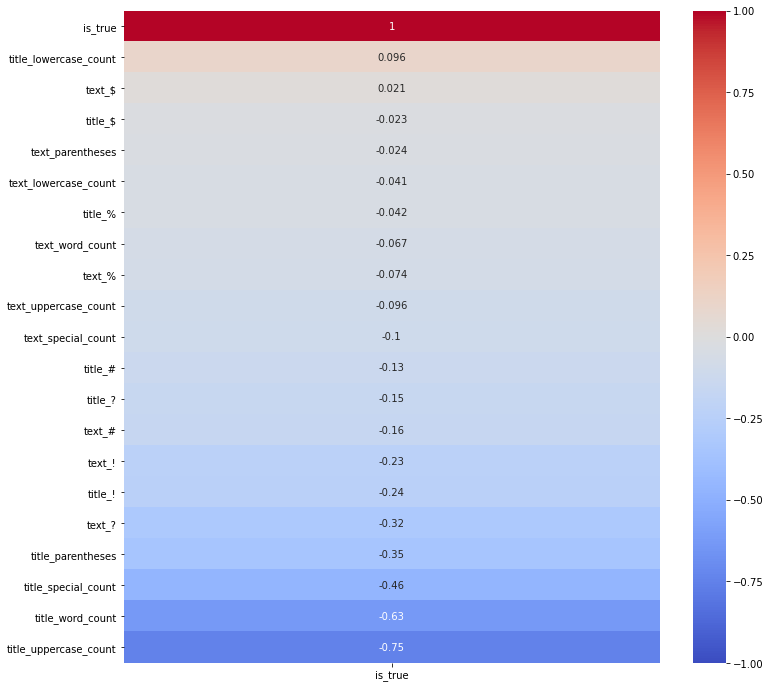

In [24]:
features = ['title_uppercase_count',
           'title_lowercase_count', 
            'title_special_count', 
            'title_!', 
            'title_?',
           'title_#', 
            'title_%', 
            'title_$', 
            'title_parentheses',
           'text_uppercase_count', 
            'text_lowercase_count', 
            'text_special_count',
           'text_!', 
            'text_?', 
            'text_#', 
            'text_%', 
            'text_$', 
            'text_parentheses',
           'title_word_count', 
            'text_word_count',
           'is_true']

heatmap_df = df[features]

plt.figure(figsize=(12,12))
sns.heatmap(heatmap_df.corr()[['is_true']].sort_values('is_true', ascending=False),
           cmap='coolwarm',
           vmin = -1,
           vmax = 1,
           annot= True);

The heatmap shows that the number of lowercase letters in the headline is the strongest correlation to real news but still very close to zero. The correlations to fake news are much stronger, such as uppercase letters in the headline, the numbers of words in the headline, and the use of special characters in the article text. 